# **Imports**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("ggplot")

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

# **Load data**

In [2]:
# Load your dataset
df = pd.read_csv("/content/MilkMeasurementsPlusGroupedTarget.csv")
df = df.drop(['SampleDate', 'ManagementAreaId', 'Id'], axis=1)  # ID rows
df = df[df["Target"] != "No treatment"]  # only 15 rows

# **Preprocess data**

In [3]:
# Separate categorical and numerical features
categorical_features = ['Breed', 'Species']
numerical_features = ['EQ', 'SomaticCellCount', 'Fat', 'Protein', 'Bacteria', 'Urea', 'ES', 'FreezingPoint']

# Separate the target variable
X = df[categorical_features + numerical_features]
y = df["Target"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Define the transformers for categorical and numerical features
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, numerical_features),
                  ('cat', categorical_transformer, categorical_features)])

# Define the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train = pipeline.fit_transform(X_train)

# Transform the test data
X_test = pipeline.transform(X_test)

# Encode the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [4]:
# Get the dictionary of the LabelEncoder
y_encoder_dict = {label: idx for idx, label in enumerate(le.classes_)}
y_encoder_dict

{'Treatment': 0, 'Veterinarian intervention': 1}

# **Machine Learning**

In [5]:
def train_evaluate_model(model_name: str, **kwargs: dict) -> None:
  # Initialize the model
  if model_name.lower() == "decision tree":
    model = DecisionTreeClassifier(random_state=42, **kwargs)
    model_name = "Decision Tree"
  elif model_name.lower() == "random forest":
    model = RandomForestClassifier(random_state=42, **kwargs)
    model_name = "Random Forest"
  elif model_name.lower() == "xgboost":
    model = XGBClassifier(random_stte=42, **kwargs)
    model_name = "XGBoost"
  else:
    raise Exception("Invalid model name")

  # Train the model
  model.fit(X_train, y_train)

  # Make predictions
  y_pred_rf = model.predict(X_test)

  # Evaluate the model
  print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred_rf))
  print(f"{model_name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
  print()

  feature_importances = pd.Series(model.feature_importances_, index=pipeline.named_steps['preprocessor'].get_feature_names_out())
  feature_importances.nlargest(10).plot(kind='barh')
  plt.title(f'Feature Importances - {model_name}')
  plt.show()

## **Decision Tree**

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       483
           1       0.88      0.89      0.89       341

    accuracy                           0.91       824
   macro avg       0.90      0.90      0.90       824
weighted avg       0.91      0.91      0.91       824

Decision Tree Confusion Matrix:
 [[443  40]
 [ 37 304]]



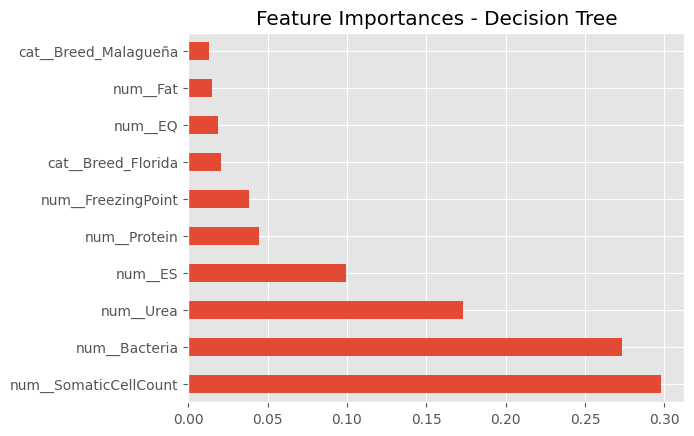

In [6]:
train_evaluate_model("decision TREE")

## **Random Forest**

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       483
           1       0.93      0.88      0.90       341

    accuracy                           0.92       824
   macro avg       0.93      0.92      0.92       824
weighted avg       0.92      0.92      0.92       824

Random Forest Confusion Matrix:
 [[461  22]
 [ 41 300]]



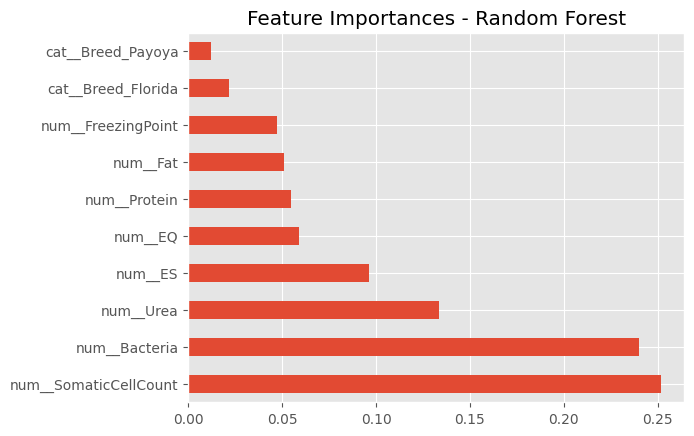

In [7]:
train_evaluate_model("Random Forest")

## **XGBoost**

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:40:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "random_stte" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       483
           1       0.94      0.91      0.92       341

    accuracy                           0.94       824
   macro avg       0.94      0.93      0.94       824
weighted avg       0.94      0.94      0.94       824

XGBoost Confusion Matrix:
 [[464  19]
 [ 32 309]]



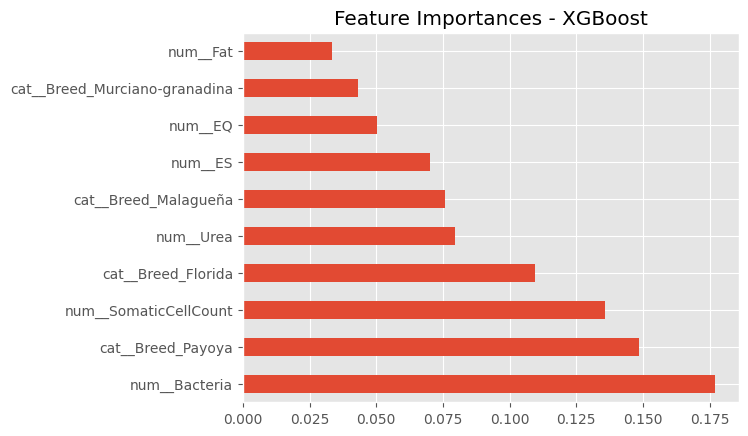

In [8]:
train_evaluate_model("XGBoost")